In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# Basic Representation

In [3]:
dfbord = pd.read_csv('Data/COUNTRY-BORDERS.csv')
dfbord.head()

,country_code,country_name,country_border_code,country_border_name
0,AD,Andorra,FR,France
1,AD,Andorra,ES,Spain
2,AE,United Arab Emirates,OM,Oman
3,AE,United Arab Emirates,SA,Saudi Arabia
4,AF,Afghanistan,CN,China


In [4]:
dfbord.nunique()

country_code           248
country_name           249
country_border_code    162
country_border_name    163
dtype: int64

In [5]:
# Object Creation
GR = nx.Graph()

vrtxs = dfbord.country_code.unique()
edges = dfbord.dropna().pipe(lambda _df: _df.assign(edges = list(zip(_df['country_code'], _df['country_border_code']))) ).edges.to_list()

GR.add_nodes_from(vrtxs)
GR.add_edges_from(edges)

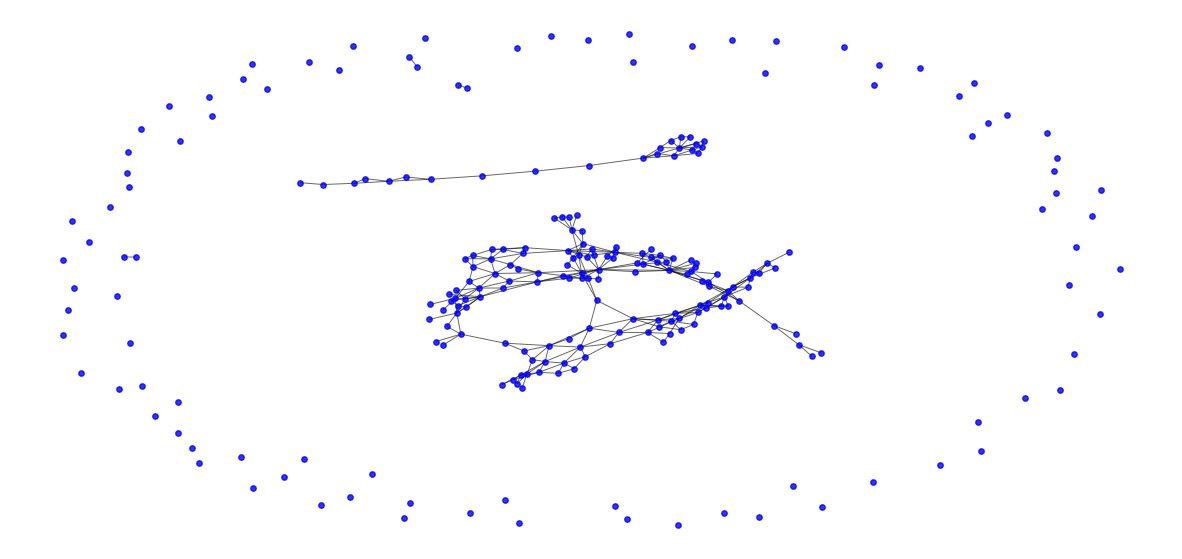

In [6]:
plt.figure(figsize=(15,7))

# Circular Layout
#pos = nx.circular_layout(GR)
#pos = nx.kamada_kawai_layout(GR) #great

pos = nx.spring_layout(GR)

# Draw nodes 
nx.draw_networkx_nodes(GR, pos, node_size=15, node_color='blue', alpha=0.8, label=vrtxs)
# Draw edges
nx.draw_networkx_edges(GR, pos, width=0.7, alpha=0.6)

sns.despine(top=True, right=True, left=True, bottom=True)
plt.show()

Top Borders

In [7]:

dfc

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58.0,Caracas,"164,175",...,45.80%,1.92,"28,515,829",59.70%,NaN,73.30%,8.80%,"25,162,368",6.423750,-66.589730
191,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84.0,Hanoi,"192,668",...,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.058324,108.277199
192,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967.0,Sanaa,"10,609",...,81.00%,0.31,"29,161,922",38.00%,NaN,26.60%,12.91%,"10,869,523",15.552727,48.516388
193,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260.0,Lusaka,"5,141",...,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.133897,27.849332


In [19]:
#topBorders = pd.Series( nx.degree_centrality(GR) )

# Reading countri names
dfc = pd.read_csv('Data/world-data-2023.csv')


# Preparing Data
topBorders = (
            pd.DataFrame( list(nx.degree_centrality(GR).items()), columns=['CountryCode', 'Centrality'] )
            .set_index('CountryCode')
            .merge( dfc.set_index('Abbreviation')[['Country']], left_index=True, right_index=True, how='left')
            .set_index('Country')
            .Centrality
            )
#dfc

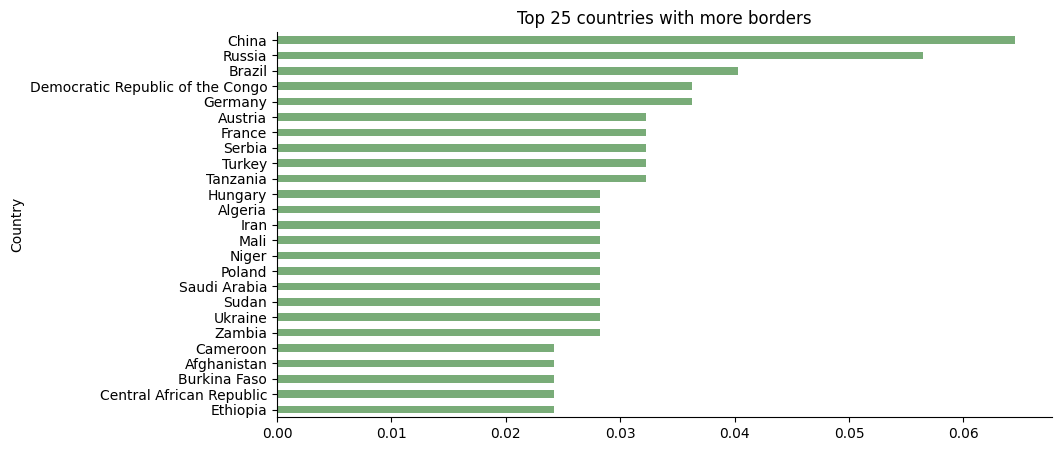

In [21]:
topBorders.nlargest(25).sort_values(ascending=True).plot.barh(figsize=(10,5), title='Top 25 countries with more borders', color=['#79AC78'])

sns.despine(top=True, right=True)
plt.show()